## 📊 Introduction to Instagram Analytics

> Instagram plays a crucial role in digital presence, offering powerful tools for:

- 💼 **Business Promotion**  
- 🎨 **Portfolio Building**  
- 🎥 **Content Creation**  
- 🧠 **Personal Branding**


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveRegressor

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

#### 🧹 Data Loading & Cleaning

> Initial step involving importing the dataset, handling missing values, and preparing data for analysis.


In [23]:
data = pd.read_csv("Instagram_reach_data.csv", encoding='latin1')

missing = data.isnull().sum()
dtypes = data.dtypes
summary = pd.DataFrame({
    'Missing Values': missing,
    'Data Type': dtypes
})
print(summary)


                Missing Values Data Type
Impressions                  0     int64
From Home                    0     int64
From Hashtags                0     int64
From Explore                 0     int64
From Other                   0     int64
Saves                        0     int64
Comments                     0     int64
Shares                       0     int64
Likes                        0     int64
Profile Visits               0     int64
Follows                      0     int64
Caption                      0    object
Hashtags                     0    object



---

## 🔍 Analyzing Components

---


In social media analytics, impressions refer to the total number of times a piece of content is displayed, regardless of whether it was clicked or engaged with. One user can contribute multiple impressions if they see the post multiple times.


---

#### 📊 Distribution Plots of Impressions

> **Based on insights from the following Instagram sections:**

- 🏠 **Home**
- 🏷️ **Hashtag**
- 🔍 **Explore**

These plots visualize how impressions are distributed across each source, helping identify content reach patterns and potential outliers.

--- 


#### 🏠 Home Feed Reach


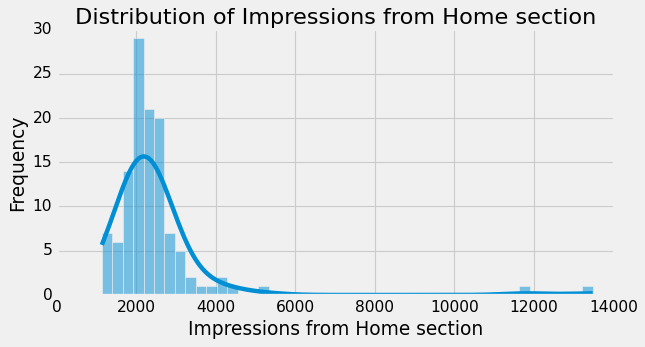

In [24]:
# impression plot for home section

plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home section")
sns.histplot(data['From Home'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Home section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- 📊 **Right-skewed distribution**
- 🔼 Peak around **2000 impressions**
- 📉 Majority ranges between **1500–3000**
- 🚀 A few viral posts reached up to **~13k**

#### 🏷️ Hashtag Performance


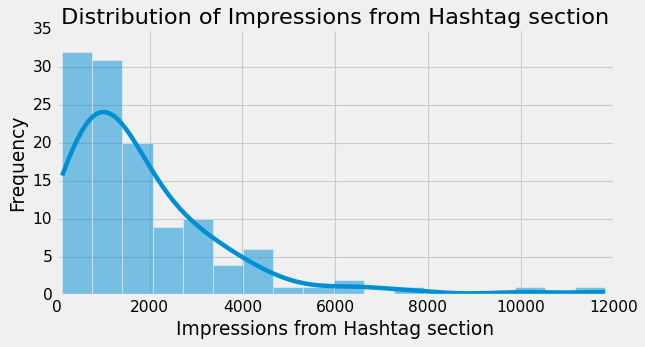

In [25]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Hashtag section")
sns.histplot(data['From Hashtags'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Hashtag section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- 📊 **Broader spread** than Home feed
- 🔄 Range: **500–3000 impressions**
- 🪁 Long tail extending to **~12k**
- ⚠️ **More volatile** and inconsistent performance
- Effective use of hashtags can lead to significant reach in some cases.

#### 🔍 Explore Section Impact


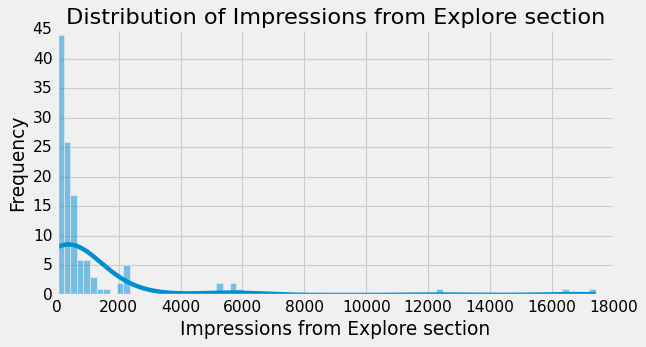

In [26]:
plt.figure(figsize=(8, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Explore section")
sns.histplot(data['From Explore'], kde=True)  # Adding kde=True for a smoother distribution curve
plt.xlabel("Impressions from Explore section")  # Adding a label for the x-axis
plt.ylabel("Frequency")  # Adding a label for the y-axis
plt.show()

- 📊 **Highly skewed distribution**
- 📉 Most posts below **1000 impressions**
- 💥 Rare viral spikes up to **~17k**
- 🎲 **Least predictable** among all sources

### 📊 Source Distribution Summary

In [27]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', 
             hole=0.3,width=600, height=400)  # Adjusted dimensions for better visibility
fig.show()


- 🏠 **Home Feed**: **44.1%** — *Most consistent*  
- 🏷️ **Hashtags**: **33.6%** — *Good potential*  
- 🔍 **Explore**: **19.2%** — *Highest variance*  
- 📁 **Others**: **3.05%** — *Minimal impact*





#### 📐 Comparative Insights

- ✅ **Consistency**: `Home > Hashtag > Explore`  
- 🚀 **Potential for High Reach**: `Explore > Hashtag > Home`  
- 📈 **Distribution Spread**:  
  - *Hashtag* — most balanced  
  - *Explore* — most dispersed  

---

#### 💡 Strategic Insight

- 🔄 **Home**: Driven by regular engagement  
- 🏷️ **Hashtag**: Visibility improves with targeted usage  
- 🔍 **Explore**: Rare but impactful exposure when reached  



---

## 🔍 Analyzing Contents

---


#### ✍️ Caption Analysis  


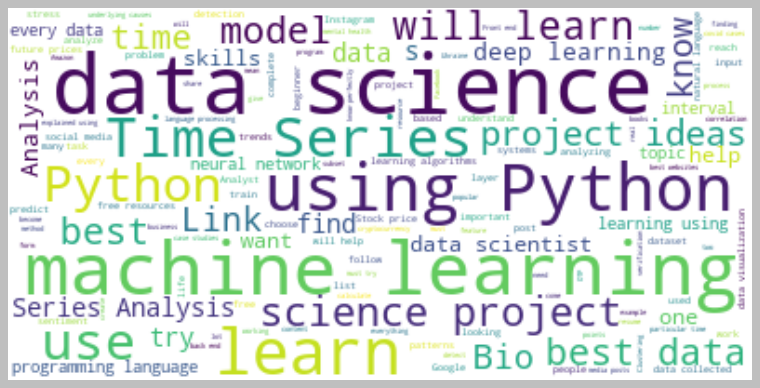

In [28]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- ☁️ **Word cloud** reveals most frequent topics  
- 🔍 Key themes identified in content  
- 💡 Strong focus on **data science** and **technology**

#### 🏷️ Hashtag Strategy  


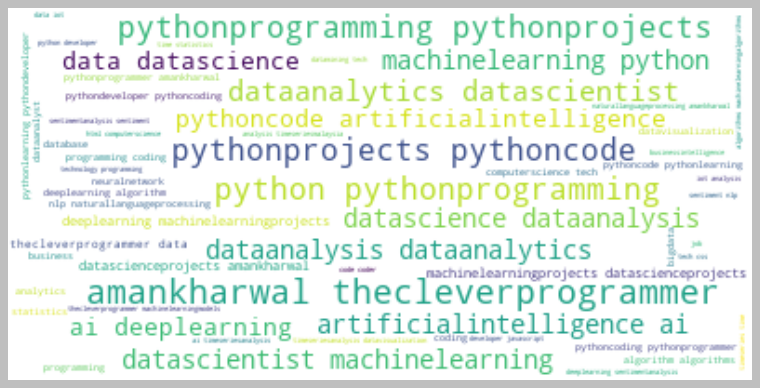

In [29]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- 📌 Most **effective hashtags** highlighted  
- 📈 Engagement **patterns identified**  
- 🗂️ Noted performance variations across **categories**


---

## 🔍 Analyzing relationships

---


#### 🫱🏼‍🫲🏼 **Relationship between the variables and Impression**

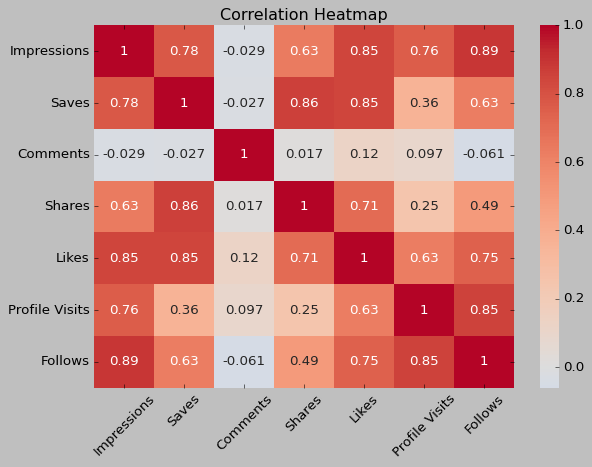

In [30]:
correlation = data.select_dtypes(include=['int64', 'int32', 'int']).drop(columns=['From Home','From Hashtags','From Explore','From Other']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 💖 **Comments, Follows, Profile visits & Saves** – *Strongest impact*  
- 🔁 **Shares** – *Moderate influence*  
- 💬 **Comments** – *Limited & negetive effect*

#### 👍 **Like–Reach Relationship**

In [31]:
figure = px.scatter(data_frame = data, x="Impressions",                    
                    height=400, width=600,
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

- 📈 **Strong positive correlation**  
- 📊 Clear **linear relationship**  
- 🔼 More **likes** lead to better **reach**

#### 💬 **Comment Impact**

In [32]:
figure = px.scatter(data_frame = data, x="Impressions",                    
                    height=400, width=600,
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Impressions")
figure.show()

- 🔻 **Weak negative correlation**  
- 🔵 **Bubble sizes** indicate frequency; most posts cluster under **10k impressions and 10 comments**  
- 📈 **Outliers** with high impressions do **not** show proportional comment increase  
- 🚫 Indicates **comments are not a strong driver** of reach  

#### 🔄 **Share Analysis**


In [33]:
figure = px.scatter(data_frame = data, x="Impressions",
                    height=400, width=600,
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

- ➕ **Moderate positive correlation**  
- 🌱 **Extends organic reach**  
- 🚀 Acts as a **virality indicator**

---

## 🔍 Analyzing conversion rate

---


#### 👤 **Profile Visit Conversion**  


In [34]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(f"Profile Visit to Follow Conversion Rate: {conversion_rate:.4f}%")

Profile Visit to Follow Conversion Rate: 41.0027%


- 🔁 **~41% conversion rate** (visits → follows)  
- 📊 **Above industry average**  
- ✅ Strong indicator of **content quality**

#### 🔗 **Visit–Follow Relationship**  


In [35]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    height=400, width=600,
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

- 📈 **Linear correlation** observed  
- 🔄 Predictable **conversion pattern**  
- 🌱 Reflects **sustainable growth**

## 📌 Key Findings



- **~45%** of reach comes from **followers**  
- **33.6%** of reach is driven by **hashtags**  
- A **linear relationship** exists between **likes** and **reach**  
- **Comments** do **not significantly** affect reach  
- The profile has an approx. **31% conversion rate** from **visits to follows**


#### 📊 Analytical Insights Provided

- 🔍 **Content Performance**  
- 🌐 **Reach Distribution & Patterns**  
- 🤝 **Engagement Relationships**  
- 🎯 **Follower Conversion Efficiency**



#### 🚀 Growth Opportunities

- 📈 **Optimize Explore Section Reach**  
- 🏷️ **Diversify and Test Hashtag Strategies**  
- ⏰ **Refine Posting Times for Maximum Reach**  
- 📊 **Analyze Engagement Behavior More Deeply**